In [73]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt

In [76]:
def itr_method(img):
    background = [img[0,0],img[0,-1],img[-1,0],img[-1,-1]]
    background_mue = np.mean(background)
    
    foreground = np.delete(img,[[0,0],[0,-1],[-1,-1],[-1,0]])
    foreground_mue = np.mean(foreground)
    
    prev_t = 0
    for i in range(200):
        t = (background_mue + foreground_mue) / 2
        
        background_1 = img[img < t]
        foreground_1 = img[img >= t]
        
        backgound_mue = np.mean(background_1)
        foreground_mue = np.mean(foreground_1)
        
        if t == prev_t:
            break
        prev_t = t
    print('Threshold value found using Otsu algorithm : '+ str( t))
    return t
        

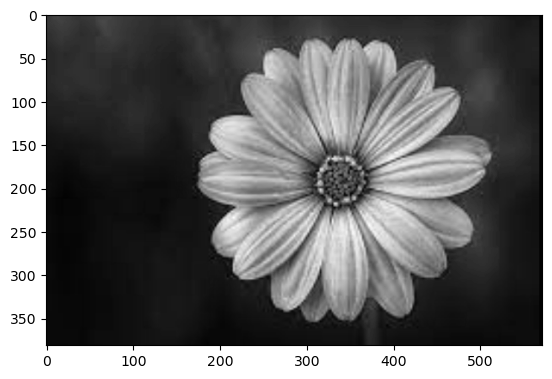

In [74]:
image = cv.imread('sc.png')
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
img=np.copy(image)
plt.imshow(img, cmap = 'gray')

In [77]:
x = itr_method(image)

Threshold value found using Otsu algorithm : 82.45440347191509


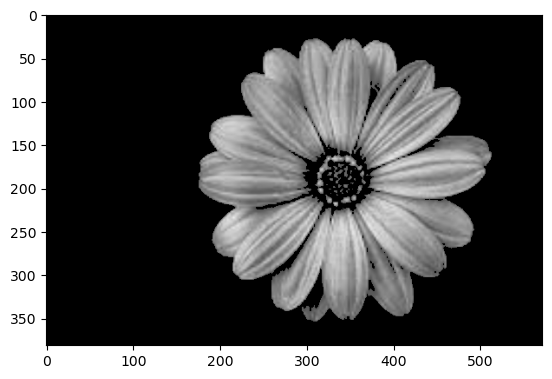

In [78]:
black=np.where((img[:,:,]<=x))
img[black]=(0)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

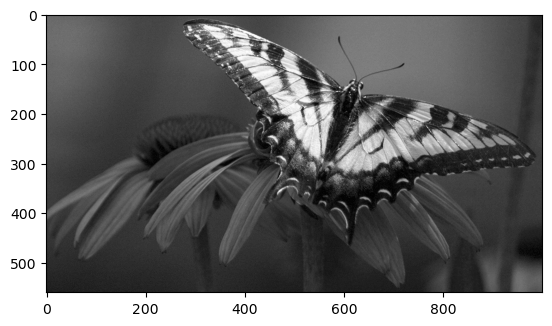

In [79]:
image_1 = cv.imread('image-one.jpg')
image_1 = cv.cvtColor(image_1,cv.COLOR_BGR2GRAY)
plt.imshow(image_1,cmap = 'gray')
img=np.copy(image_1)

In [80]:
x = itr_method(image_1)

Threshold value found using Otsu algorithm : 110.9354150778952


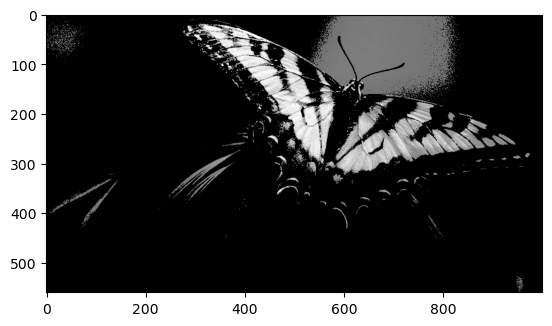

In [81]:
black=np.where((img[:,:]<=x))
img[black]=(0)
# img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap='gray')